# Importação das Bibliotecas


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Importação do Data frame <br>

e Validação dos dados


In [115]:
pd.set_option("display.max_columns", None)

DF_model_pca = pd.read_parquet("../arquivos_parquet/DF_to_model.parquet")

In [116]:
DF_model_pca.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE_NAME,ORIGIN_AIRPORT_NAME,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,US Airways Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,American Airlines Inc.,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NA,0.0,0.0,0.0,0.0,0.0,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,0


In [117]:
valores_nulos = DF_model_pca.isnull().sum()
print(valores_nulos)

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
TAXI_OUT                    0
WHEELS_OFF                  0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
WHEELS_ON                   0
TAXI_IN                     0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
AIRLINE_NAME                0
ORIGIN_AIRPORT_NAME         0
ORIGIN_CIT

#### Escolha das Features


In [118]:
pca_features = [
    "DEPARTURE_DELAY",
    "ARRIVAL_DELAY",
    "AIR_TIME",
    "DISTANCE",
    "AIR_SYSTEM_DELAY",
    "SECURITY_DELAY",
    "AIRLINE_DELAY",
    "LATE_AIRCRAFT_DELAY",
    "WEATHER_DELAY",
    "ORIGIN_LATITUDE",
    "ORIGIN_LONGITUDE",
    "DESTINATION_LATITUDE",
    "DESTINATION_LONGITUDE",
]

In [119]:
X = DF_model_pca[pca_features].fillna(0)

#### Padronização dos dados <br>

e Criação do modelo


In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [121]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [122]:
print("Dimensões antes:", X.shape[1])
print("Dimensões depois:", X_pca.shape[1])
print("Variância explicada:", pca.explained_variance_ratio_.sum())

Dimensões antes: 13
Dimensões depois: 9
Variância explicada: 0.9629188459303668


In [123]:
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)
var = pca_2d.explained_variance_ratio_

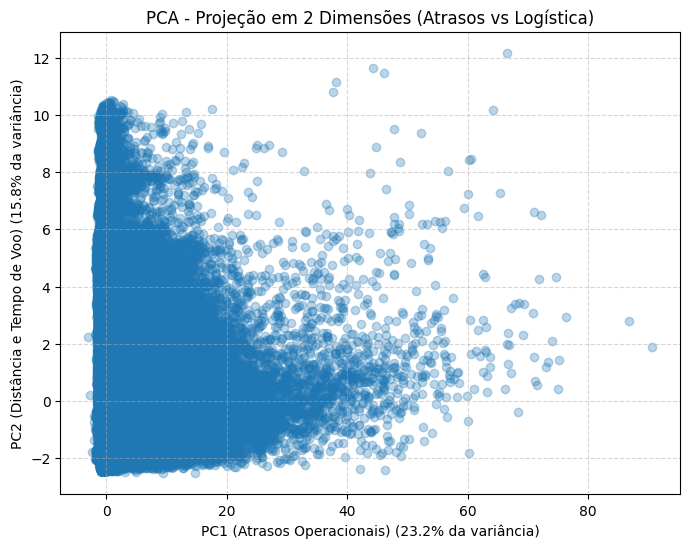

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.3)

plt.xlabel(f"PC1 (Atrasos Operacionais) ({var[0]*100:.1f}% da variância)")
plt.ylabel(f"PC2 (Distância e Tempo de Voo) ({var[1]*100:.1f}% da variância)")

plt.title("PCA - Projeção em 2 Dimensões (Atrasos vs Logística)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [125]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=pca_features,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
)

In [126]:
print("\nTabela de Loadings (Influência das variáveis nos componentes):")
print(loadings)


Tabela de Loadings (Influência das variáveis nos componentes):
                            PC1       PC2       PC3       PC4       PC5  \
DEPARTURE_DELAY        0.564692  0.015087 -0.015221 -0.004548 -0.053775   
ARRIVAL_DELAY          0.566163 -0.005685 -0.036603 -0.002408  0.024519   
AIR_TIME               0.007219  0.656711  0.260047  0.038601 -0.001352   
DISTANCE               0.001253  0.660526  0.242030  0.029096 -0.013201   
AIR_SYSTEM_DELAY       0.225310  0.008742  0.069059  0.069953  0.448692   
SECURITY_DELAY         0.016568  0.004769  0.000254 -0.001193  0.027849   
AIRLINE_DELAY          0.372262  0.020488 -0.021153 -0.027387 -0.525184   
LATE_AIRCRAFT_DELAY    0.378018 -0.014501 -0.051001 -0.007640 -0.010434   
WEATHER_DELAY          0.162657 -0.006346  0.012993  0.014330  0.715628   
ORIGIN_LATITUDE       -0.001309 -0.034766  0.009686  0.704225 -0.050251   
ORIGIN_LONGITUDE       0.028561 -0.231565  0.669487 -0.021342 -0.033834   
DESTINATION_LATITUDE   0.001224 -0.0

#### Considerações


#### 1. Diagnóstico da Eficiência Operacional (O Eixo PC1)

- A nossa primeira componente principal (PC1), que retém 23.2% da variância do dataset,<br>
  funciona como um "Índice de Atraso Gerencial".

  - **Fator Dominante:** O atraso de partida e chegada (DEPARTURE_DELAY e ARRIVAL_DELAY) <br>
    possuem os maiores pesos (0.56), seguidos por atrasos causados pela própria companhia <br>
    (AIRLINE_DELAY) e por aeronaves que chegam tarde (LATE_AIRCRAFT_DELAY).
  - **Insight:** O modelo revela que a maior fonte de instabilidade na operação não é o clima, <br>
    mas sim o efeito cascata operacional. Problemas internos da empresa e a logística <br>
    de reuso de aeronaves impactam o sistema mais do que qualquer fator externo.

#### 2. Desacoplamento Logístico (O Eixo PC2)

- A segunda componente (PC2), com 15.8% da variância, isola a magnitude da malha.
  - **Fator Dominante:** É composta quase inteiramente por DISTANCE (0.66) e AIR_TIME (0.65).
  - **Insight:** O fato de a distância estar em um eixo separado do atraso operacional é uma <br>
    excelente notícia. Isso demonstra que voos longos não são intrinsecamente <br>
    mais propensos a atrasos do que voos curtos. A distância é uma característica física da malha,<br>
    enquanto o atraso é uma falha de processo.

#### 3. Identificação de "Anomalias de Segurança" (PC6)

- Um achado fascinante do modelo aparece no PC6.
  - **Fator Dominante:** Esta componente isola quase que exclusivamente o SECURITY_DELAY (peso de 0.99).
  - **Insight:** Na prática, o PCA identificou que atrasos por segurança são tão raros e distintos <br>
    estatisticamente que não se misturam com os atrasos operacionais comuns. <br>
    Eles são "outliers" puros que não seguem o comportamento padrão da aviação comercial.

#### 4. Análise Geográfica vs. Atrasos (PC3 e PC4)

- As coordenadas geográficas (LATITUDE e LONGITUDE) foram agrupadas separadamente nos componentes 3 e 4.
  - **Insight:** Isso sugere que a localização geográfica dos aeroportos (norte/sul ou leste/oeste) <br>
    tem um impacto secundário na variância dos dados em comparação com os tempos de voo e atrasos. <br>
    O modelo prioriza a performance do tempo sobre a posição no mapa.

#### Conclusão

- Ao analisarmos o gráfico de dispersão gerado, podemos dividir nossa frota em quadrantes estratégicos:
  - **Zona de Eficiência (Baixo PC1):** Voos que operam dentro da normalidade, independente da distância.
  - **Zona Crítica (Alto PC1):** Voos que demandam intervenção imediata nos processos de solo e manutenção,<br>
    pois estão "puxando" a variância negativa do sistema.


# K-Means

- ultilizaremos os componentes (PC1 e PC2) como entrada para o <br>
  modelo de Clustering K-means, para agrupar os voos e criar possiveis perfis de risco


In [127]:
# Busca pelo K ideal
range_k = range(2, 11)
inercias = []
silhuetas = []

In [ ]:
print("Iniciando a busca pelo K ideal sobre os dados do PCA...")

for k in range_k:
    # 1. O K-Means continua usa todos os dados
    kmeans_teste = KMeans(
        n_clusters=k, random_state=42, n_init=5
    )  # n_init=5 é suficiente
    labels = kmeans_teste.fit_predict(X_pca_2d)
    inercias.append(kmeans_teste.inertia_)

    # 2. Otimização: Calcular Silhueta
    # apenas em uma amostra (ex: 20.000 linhas)
    sample_size = min(20000, X_pca_2d.shape[0])
    indices = np.random.choice(X_pca_2d.shape[0], sample_size, replace=False)

    score = silhouette_score(X_pca_2d[indices], labels[indices])
    silhuetas.append(score)
    print(f"K={k} finalizado (amostra de {sample_size} pontos).")

Iniciando a busca pelo K ideal sobre os dados do PCA...
K=2 finalizado (amostra de 20000 pontos).
K=3 finalizado (amostra de 20000 pontos).
K=4 finalizado (amostra de 20000 pontos).
K=5 finalizado (amostra de 20000 pontos).
K=6 finalizado (amostra de 20000 pontos).
K=7 finalizado (amostra de 20000 pontos).
K=8 finalizado (amostra de 20000 pontos).
K=9 finalizado (amostra de 20000 pontos).
K=10 finalizado (amostra de 20000 pontos).


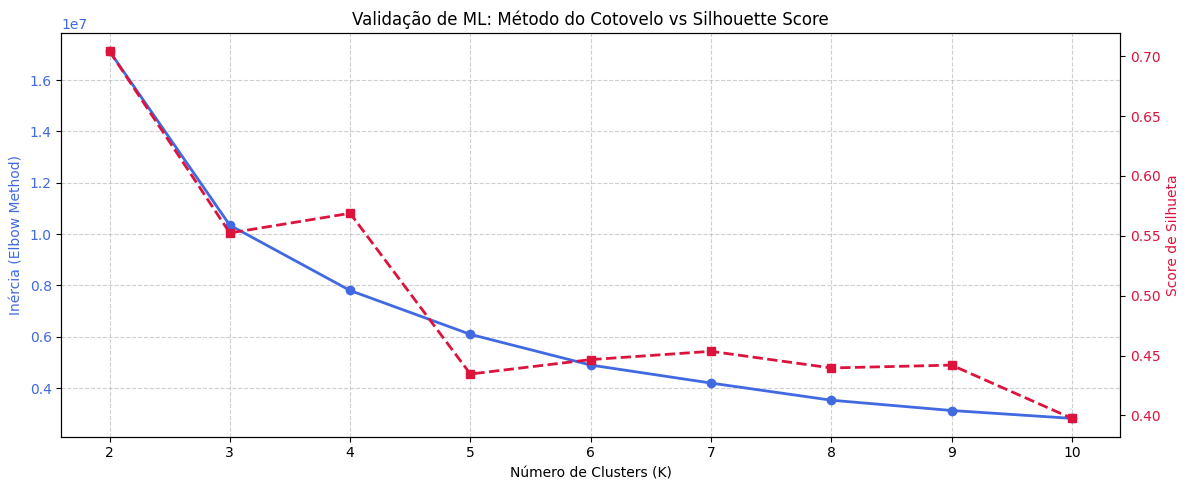

In [129]:
# --- Visualização das Métricas de Validação ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot da Inércia (Eixo Esquerdo)
ax1.set_xlabel("Número de Clusters (K)")
ax1.set_ylabel("Inércia (Elbow Method)", color="royalblue")
ax1.plot(range_k, inercias, marker="o", color="royalblue", linewidth=2)
ax1.tick_params(axis="y", labelcolor="royalblue")

# Plot da Silhueta (Eixo Direito)
ax2 = ax1.twinx()
ax2.set_ylabel("Score de Silhueta", color="crimson")
ax2.plot(
    range_k,
    silhuetas,
    marker="s",
    linestyle="--",
    color="crimson",
    linewidth=2,
)
ax2.tick_params(axis="y", labelcolor="crimson")

plt.title("Validação de ML: Método do Cotovelo vs Silhouette Score")
ax1.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()
plt.show()

In [130]:
# Com base nos gráficos acima, define-se o melhor K (exemplo: 4)
n_clusters_final = 4
kmeans = KMeans(n_clusters=n_clusters_final, random_state=42, n_init=10)

# Aplicando sobre os dados do PCA
clusters = kmeans.fit_predict(X_pca_2d)

# Adicionando o rótulo ao DataFrame original para análise de negócios
DF_model_pca["CLUSTER"] = clusters

c:\Users\Pc Gamer\OneDrive\FIAP\Machine Learnig Engineering\Fase - 03\fiap_tech_challenge_fase3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


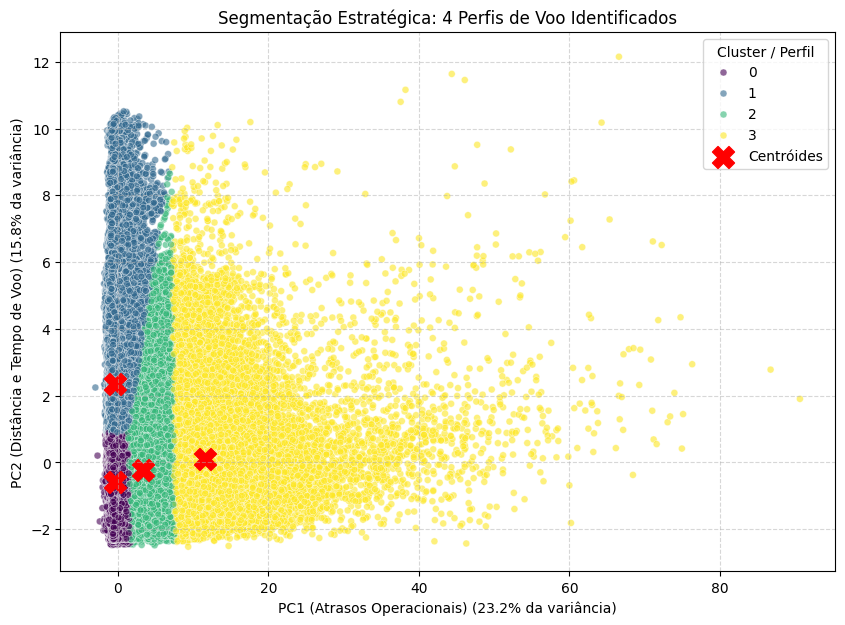

In [131]:
plt.figure(figsize=(10, 7))

# Scatter plot colorido pelos clusters
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=DF_model_pca["CLUSTER"],
    palette="viridis",
    alpha=0.6,
    s=25,
)

# Destacando os Centróides
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="X",
    s=250,
    color="red",
    label="Centróides",
)

# Rótulos baseados na interpretação dos Loadings do PCA
plt.xlabel(f"PC1 (Atrasos Operacionais) ({var[0]*100:.1f}% da variância)")
plt.ylabel(f"PC2 (Distância e Tempo de Voo) ({var[1]*100:.1f}% da variância)")
plt.title(
    f"Segmentação Estratégica: {n_clusters_final} Perfis de Voo Identificados"
)
plt.legend(title="Cluster / Perfil")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [132]:
# Média das variáveis originais por cluster para caracterizar os grupos
analise_clusters = DF_model_pca.groupby("CLUSTER")[pca_features].mean()
print("\n--- Características Médias de cada Perfil (Cluster) ---")
print(analise_clusters)


--- Características Médias de cada Perfil (Cluster) ---
         DEPARTURE_DELAY  ARRIVAL_DELAY    AIR_TIME     DISTANCE  \
CLUSTER                                                            
0               0.953057      -3.820879   84.460694   577.591959   
1               3.639462      -3.987259  230.479005  1820.660510   
2              79.149620      80.538770  105.322070   741.958274   
3             257.408138     257.876180  119.539217   861.073372   

         AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
CLUSTER                                                                         
0                1.116962        0.005567       0.785773             0.904092   
1                1.719870        0.012935       1.485687             1.012832   
2               15.277802        0.095206      24.327662            36.860777   
3               34.132015        0.151385     100.769456           101.881471   

         WEATHER_DELAY  ORIGIN_LATITUDE  ORIGIN

#### Segmentação Estratégica da Operação (K-Means)

- Utilizamos o Método do Cotovelo e o Score de Silhueta para validar que <br>
  a divisão em 4 perfis (clusters) é a mais precisa para representar os dados.
  _ **Cluster 0 (Roxo) - Operação Padrão:** Voos de curta distância com <br>
  altíssima pontualidade. É o "benchmark" de eficiência da CIA Aérea.
  _ **Cluster 1 (Azul) - Performance de Longo Curso:** Rotas longas <br>
  (média de ~1.820 milhas) que operam com baixíssimo índice de atraso. <br>
  Demonstram que o planejamento de rotas longas está otimizado.
  _ **Cluster 2 (Verde) - Alerta Operacional:** Voos que sofrem atrasos <br>
  moderados (~79 min), predominantemente causados por aeronaves que já chegam <br>
  atrasadas de trechos anteriores. Indica um gargalo no tempo de solo.
  _ **Cluster 3 (Amarelo) - Grupo Crítico:** Voos com atrasos severos, superando as 4 horas <br>
  de espera. Embora o clima influencie este grupo, os fatores gerenciais <br>
  (AIRLINE_DELAY) são os maiores responsáveis pela magnitude do colapso nestas rotas.
